In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\hp\OneDrive\AppData\Desktop\pydata1\QUANTUM DATA\quantium_merged_data.csv")

In [4]:
data.head()

,Unnamed: 0,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACKET_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,ext_names
0,0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt
1,1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,RRD,150,YOUNG SINGLES/COUPLES,Mainstream,CCs Nacho Cheese
2,2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,GrnWves,210,YOUNG FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken
3,3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175,YOUNG FAMILIES,Budget,Smiths Crinkle Cut Chips Chicken
4,4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,Woolworths,160,OLDER SINGLES/COUPLES,Mainstream,Smiths Chip Thinly S/CreamOnion


In [5]:
data.columns

Index(['Unnamed: 0', 'LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID',
       'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'BRAND',
       'PACKET_SIZE', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'ext_names'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        246740 non-null  int64  
 1   LYLTY_CARD_NBR    246740 non-null  int64  
 2   DATE              246740 non-null  object 
 3   STORE_NBR         246740 non-null  int64  
 4   TXN_ID            246740 non-null  int64  
 5   PROD_NBR          246740 non-null  int64  
 6   PROD_NAME         246740 non-null  object 
 7   PROD_QTY          246740 non-null  int64  
 8   TOT_SALES         246740 non-null  float64
 9   BRAND             246740 non-null  object 
 10  PACKET_SIZE       246740 non-null  int64  
 11  LIFESTAGE         246740 non-null  object 
 12  PREMIUM_CUSTOMER  246740 non-null  object 
 13  ext_names         246740 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 26.4+ MB


In [7]:
data.drop(columns = 'Unnamed: 0' , inplace = True)

In [8]:
data.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'BRAND', 'PACKET_SIZE',
       'LIFESTAGE', 'PREMIUM_CUSTOMER', 'ext_names'],
      dtype='object')

In [9]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [11]:
life_df = data.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending = False).reset_index()

In [12]:
life_df

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,376019.65
1,RETIREES,342381.90
2,OLDER FAMILIES,328519.90
3,YOUNG FAMILIES,294627.90
4,YOUNG SINGLES/COUPLES,243756.60
5,MIDAGE SINGLES/COUPLES,172523.80
6,NEW FAMILIES,47347.95


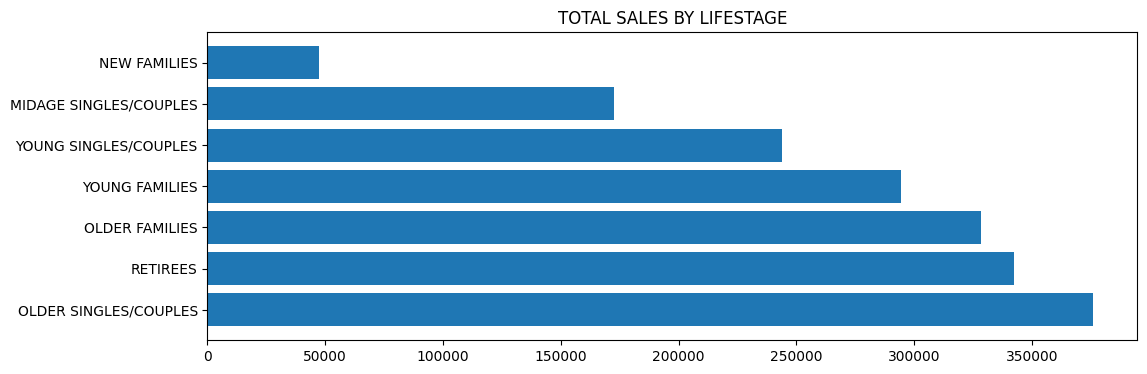

In [13]:
plt.figure(figsize = (12,4))
plt.barh(life_df['LIFESTAGE'] , life_df['TOT_SALES'])
plt.title('TOTAL SALES BY LIFESTAGE')
plt.show()

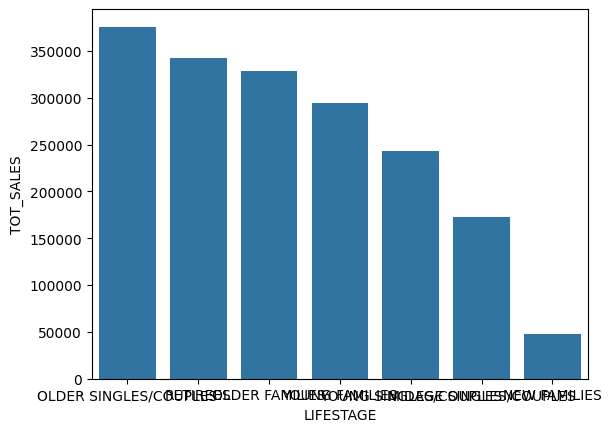

In [14]:
sns.barplot(data=life_df,x='LIFESTAGE',y='TOT_SALES')
plt.show()

In [15]:
prem_df =data.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().sort_values(ascending = False).reset_index()

In [16]:
prem_df

,PREMIUM_CUSTOMER,PROD_QTY
0,Mainstream,180780
1,Budget,165774
2,Premium,123845


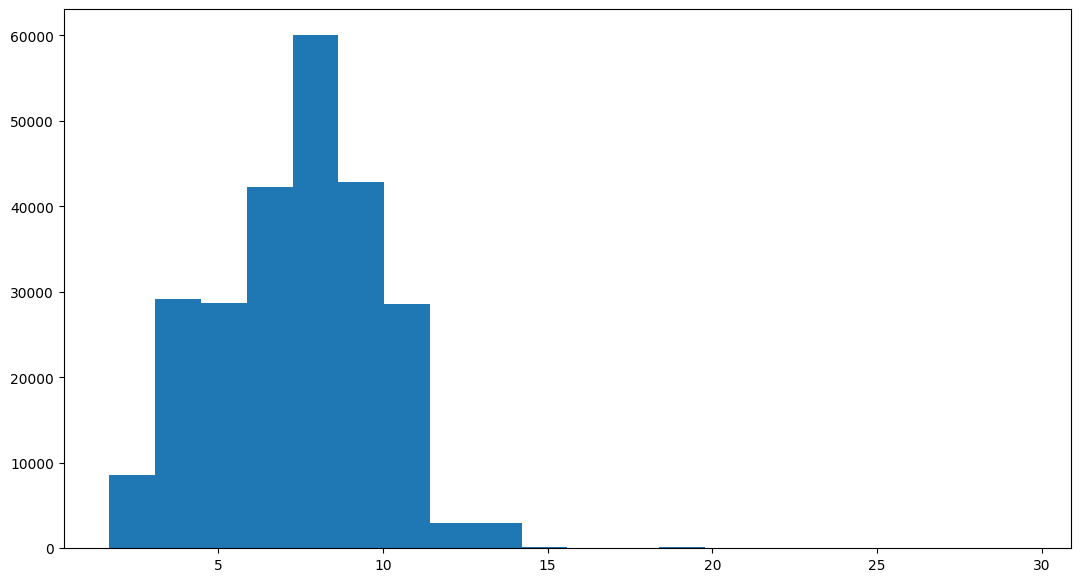

In [17]:
plt.figure(figsize =(13 , 7))
plt.hist(data=data , x = 'TOT_SALES' , bins =20 ,)
plt.show()

In [18]:
data['TOT_SALES'].describe()

count    246740.000000
mean          7.316113
std           2.474897
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max          29.500000
Name: TOT_SALES, dtype: float64

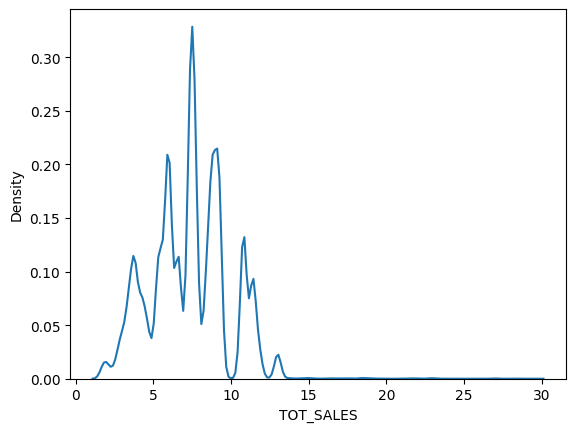

In [19]:
sns.kdeplot(data=data , x = 'TOT_SALES')
plt.show()

<Axes: xlabel='TOT_SALES', ylabel='LIFESTAGE'>

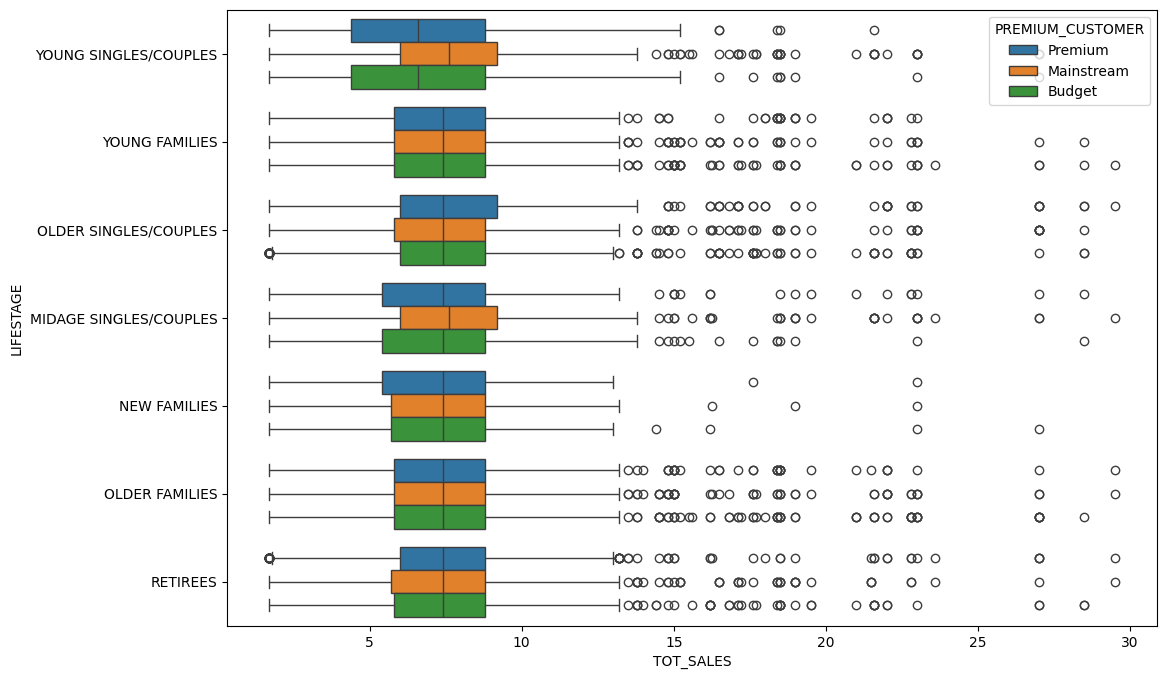

In [20]:
plt.figure (figsize = (12,8))
sns.boxplot(data=data ,y='LIFESTAGE' , x='TOT_SALES' , hue ='PREMIUM_CUSTOMER')

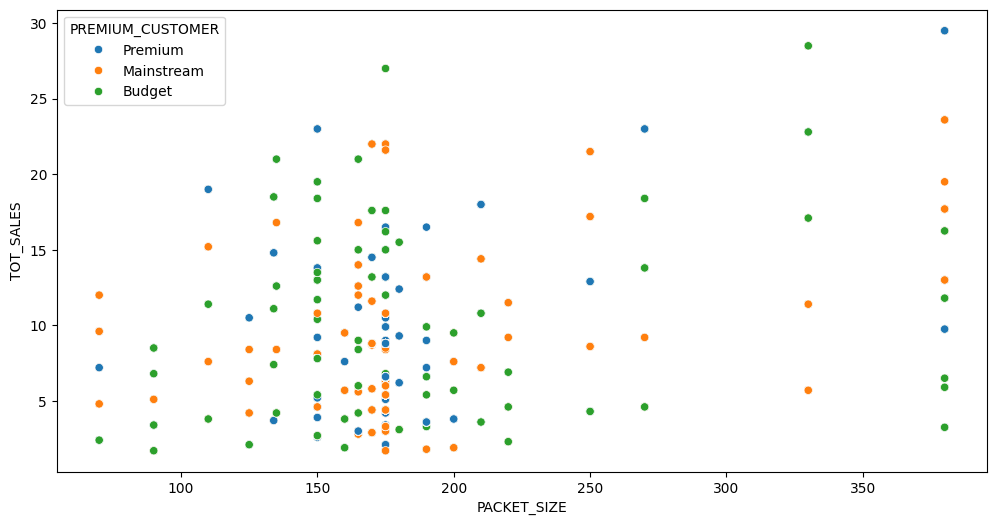

In [21]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=data , x = 'PACKET_SIZE' , y = 'TOT_SALES' , hue = 'PREMIUM_CUSTOMER')
plt.show()

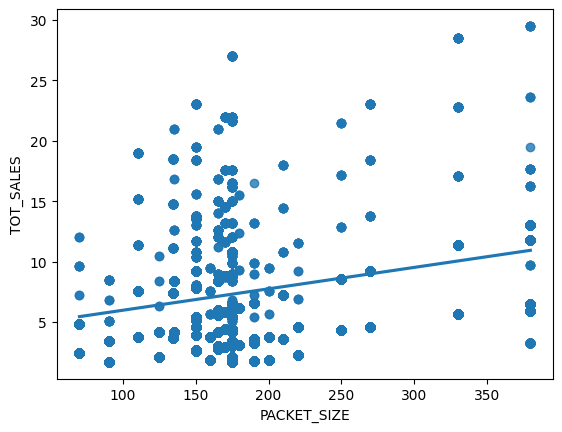

In [22]:
sns.regplot(data=data , x = 'PACKET_SIZE' , y = 'TOT_SALES')
plt.show()